#Word Embeddings in Python with Gensim

A **word embedding** is an approach to provide a dense vector representation of words that capture something about their meaning.

Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text. Each word is represented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word.

Simply put, word embeddings allow us to represent words in the form of vectors. But these are not just any vectors. The aim is to represent words via vectors so that similar words or words used in a similar context are close to each other while antonyms are far apart in the vector space.
There are a few techniques to determine if these embeddings are trained on a large enough corpus (i.e., Wikipedia), the most prevalent being word2vec and GloVe. We will go over both below


**Gensim** is an open source Python library for natural language processing, with a focus on topic modeling.

It is not an everything-including-the-kitchen-sink NLP research library (like NLTK); instead, Gensim is a mature, focused, and efficient suite of NLP tools for topic modeling. Most notably for this tutorial, it supports an implementation of the Word2Vec word embedding for learning new word vectors from text.

It also provides tools for loading pre-trained word embeddings in a few formats and for making use and querying a loaded embedding.

##Word2Vec

[Word2vec](https://en.wikipedia.org/wiki/Word2vec) is one algorithm for learning a word embedding from a text corpus.

In [8]:
!pip install Word2Vec

  Using cached https://files.pythonhosted.org/packages/ce/51/5e2782b204015c8aef0ac830297c2f2735143ec90f592b9b3b909bb89757/word2vec-0.10.2.tar.gz
  Running setup.py bdist_wheel for Word2Vec ... - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/ef/9f/06/aec42532c9c37e05f936d4d586b15cfdfc9f2ffb62bd7fed1c
Successfully built Word2Vec


In [0]:
from gensim.models import Word2Vec

In [12]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 3.9451299e-04 -3.7790255e-03  8.1294501e-04  5.4770755e-04
  2.4536564e-03 -1.1561071e-03 -3.2281302e-04 -4.1743895e-04
  4.2376732e-03 -7.6546828e-04  2.0439010e-04 -1.9744283e-03
 -1.0982477e-03 -1.9072240e-03  2.9987271e-03  4.4687451e-03
 -1.3305889e-03 -1.6804198e-04  3.1064541e-04  1.6751086e-03
  3.3429998e-03 -4.9521746e-03 -3.0029097e-04 -1.7354003e-03
 -3.9196061e-03  9.9007424e-04 -2.8638544e-03  1.4776015e-03
 -2.2481759e-03 -4.7226651e-03  3.2622511e-03 -3.7531096e-03
 -1.1150147e-03 -3.3788111e-03 -1.1935713e-03 -3.5729338e-03
  1.5615475e-03 -4.1010147e-03  3.5409722e-03  1.7059098e-04
 -4.5995153e-03 -4.3750461e-03  1.4902499e-04 -4.0227305e-03
 -1.7743728e-03 -3.8863514e-03 -1.0474695e-04  4.4295187e-03
 -8.1229972e-04  4.3542483e-03  2.7379461e-03 -8.8155916e-04
  4.1617397e-03  3.8128751e-03 -2.5061010e-0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


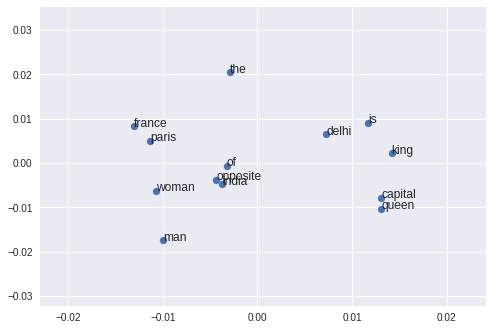

In [19]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['king', 'is', 'opposite', 'of', 'queen'],
			['man', 'is', 'the', 'opposite', 'of', 'woman'],
			['delhi', 'is', 'capital','of', 'india'],
			['paris', 'is', 'capital','of', 'france']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()



##GloVe

**Global Vectors for Word Representation**

A pre-trained model is nothing more than a file containing tokens and their associated word vectors. The pre-trained Google word2vec model was trained on Google news data (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors.

More about GloVe [here](https://nlp.stanford.edu/projects/glove/)

In [22]:
!wget -O glove.zip http://nlp.stanford.edu/data/glove.6B.zip
!unzip -o glove.zip -d data

--2018-10-23 07:30:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-10-23 07:30:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.zip’

glove.zip           100%[===================>] 822.24M  1.40MB/s    in 8m 35s  

2018-10-23 07:38:54 (1.60 MB/s) - ‘glove.zip’ saved [862182613/862182613]

Archive:  glove.zip
  inflating: data/glove.6B.50d.txt   
  inflating: data/glove.6B.100d.txt  
  inflating: data/glove.6B.200d.txt  
  inflating: data/glove.6B.300d.txt  


In [23]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'data/glove.6B.100d.txt'
word2vec_output_file = 'data/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [28]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'data/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result1 = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
# calculate: (boy - man) + woman = ?
result2 = model.most_similar(positive=['woman', 'boy'], negative=['man'], topn=1)
print(result1)
print(result2)

[('queen', 0.7698541283607483)]
[('girl', 0.9095937013626099)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [31]:
model.most_similar("girl")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('boy', 0.9175729155540466),
 ('woman', 0.847267210483551),
 ('girls', 0.7953022718429565),
 ('mother', 0.78807133436203),
 ('child', 0.7634811997413635),
 ('teen', 0.7468993663787842),
 ('girlfriend', 0.7443794012069702),
 ('teenager', 0.7436219453811646),
 ('baby', 0.7423103451728821),
 ('teenage', 0.7407196760177612)]

# References

https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

https://medium.com/explore-artificial-intelligence/word2vec-a-baby-step-in-deep-learning-but-a-giant-leap-towards-natural-language-processing-40fe4e8602ba

http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W87etVUza1t

https://github.com/kavgan/nlp-text-mining-working-examples/blob/master/word2vec/Word2Vec.ipynb